In [1]:
globals().clear()

import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LinearSegmentedColormap



os.chdir('C:/Users/lbeatty/Documents/Lauren_MIP_Contribution/')

#scenario = '26z-thin-debug'
#scenario = '26z-short-base-50'
scenario = '26z-short-current-policies'
model='GenX'


C:\Users\lbeatty\AppData\Local\Temp\ipykernel_7448\2455004916.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


PROJCS["Lambert_Conformal_Conic",GEOGCS["GCS_unnamed ellipse",DATUM["D_unknown",SPHEROID["Unknown",6370997,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",40],PARAMETER["central_meridian",-97],PARAMETER["standard_parallel_1",33],PARAMETER["standard_parallel_2",45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
EPSG:4326


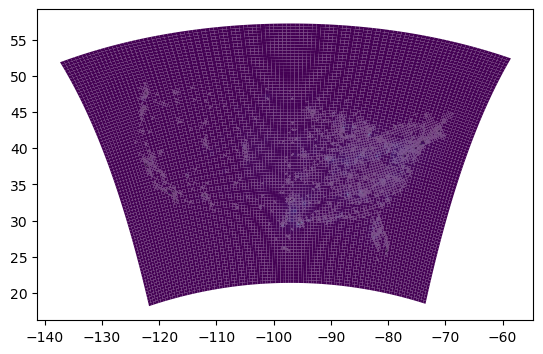

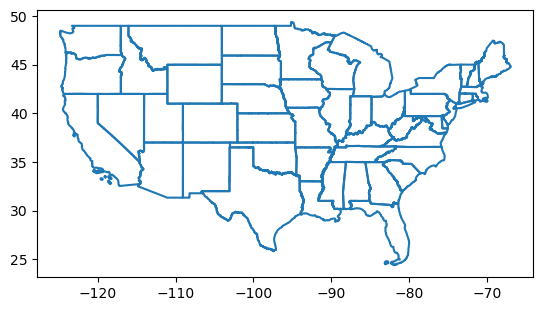

In [10]:
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
states = states[~states['STUSPS'].isin(['AS', 'AK', 'GU', 'MP', 'VI', 'HI', 'PR'])]


year='2020'
column='TotalPM25'
emissions = gpd.read_file('InMap/MIP_InMap_Output/'+scenario+'/'+model+'/ISRM_result_'+year+'.shp')
print(emissions.crs)
emissions = emissions.to_crs("EPSG:4326")
states = states.to_crs(emissions.crs)
print(states.crs)
intersects = emissions.geometry.intersects(states.unary_union).reset_index()
emissions.plot(column='TotalPM25')
states.boundary.plot()
plt.show()


PROJCS["Lambert_Conformal_Conic",GEOGCS["GCS_unnamed ellipse",DATUM["D_unknown",SPHEROID["Unknown",6370997,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",40],PARAMETER["central_meridian",-97],PARAMETER["standard_parallel_1",33],PARAMETER["standard_parallel_2",45],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


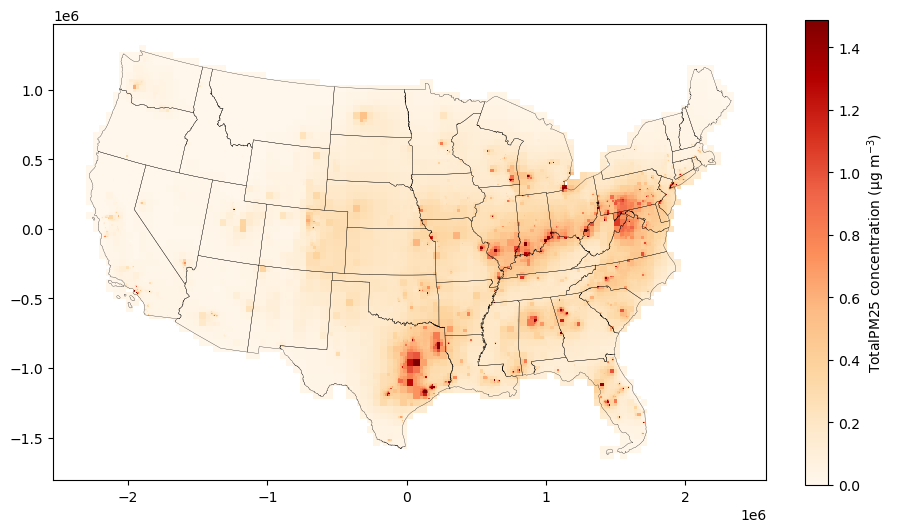

None


ValueError: Must pass either crs or epsg.

In [14]:
#Plot output -- map of concentrations

states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
states = states[~states['STUSPS'].isin(['AS', 'AK', 'GU', 'MP', 'VI', 'HI', 'PR'])]

years = ['2020', '2030', '2040', '2050']
quant_dict={}
for year in years:
    emissions = gpd.read_file('InMap/MIP_InMap_Output/'+scenario+'/'+model+'/ISRM_result_'+year+'.shp')



    # Transform coordinates to match output
    #drop grid cells not in continental us
    print(emissions.crs)
    states = states.to_crs(emissions.crs)
    intersects = emissions.geometry.intersects(states.unary_union)
    emissions['intersects'] = intersects
    emissions = emissions[emissions['intersects']==True]

    columns_to_plot = ['TotalPM25']
    for column in columns_to_plot:

        #want scales to be the same for each plot
        if year=='2020':
            q = 0.99  # Truncate results at the 99th percentile for better visualization
            cut = np.quantile(emissions[column], q)
            quant_dict[column]=cut

        fig, ax = plt.subplots(figsize=(10, 8))

        # Plot data with color scale truncated at the specified quantile
        emissions.plot(vmin=0, vmax=cut, cmap="OrRd", column=column, ax=ax)

        # Plot states boundaries
        states.boundary.plot(ax=ax, color='black', linewidth=0.2)

        # Add color bar
        sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=quant_dict[column]))
        sm._A = []  # Fake empty array for the colorbar
        cbar = fig.colorbar(sm, fraction=0.03)  
        cbar.set_label(column+' concentration (μg m$^{-3}$)')  # Set color bar label

        plt.savefig('MIP_AirPollution/Figures/Output/' + scenario + '/' + model + '/' +year+'_'+ column + '_concentrationmap.jpg', format='jpg',
                    dpi=300, bbox_inches='tight')
        plt.show()